# Logistic Regression with test output

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create DataFrame directly
data = pd.DataFrame({
    'Age': [18, 45, 43, 23, 33, 22, 25, 12],
    'Gender': ['Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male'],
    'Smoking': ['Smoker', 'Non-Smoker', 'Smoker', 'Smoker', 'Smoker', 'Non-Smoker', 'Smoker', 'Smoker'],
    'Cancer': [0, 0, 1, 0, 1, 1, 1, 0]
})

# Encode categorical variables
le_gender = LabelEncoder()
le_smoking = LabelEncoder()

data['Gender'] = le_gender.fit_transform(data['Gender'])   # Female=0, Male=1
data['Smoking'] = le_smoking.fit_transform(data['Smoking'])  # Non-Smoker=0, Smoker=1

# Features and target
X = data[['Age', 'Gender', 'Smoking']]
y = data['Cancer']

# Split data (optional for small data — but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Predict for a custom new person
new_data = pd.DataFrame({'Age': [30], 'Gender': [le_gender.transform(['Male'])[0]], 'Smoking': [le_smoking.transform(['Smoker'])[0]]})
prediction = model.predict(new_data)
print("Cancer prediction for new person:", prediction[0])  # 1 or 0


Accuracy: 0.0
Confusion Matrix:
 [[0 1]
 [1 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Cancer prediction for new person: 1


# Logistic Regression Sigmoid Functions for all outcomes

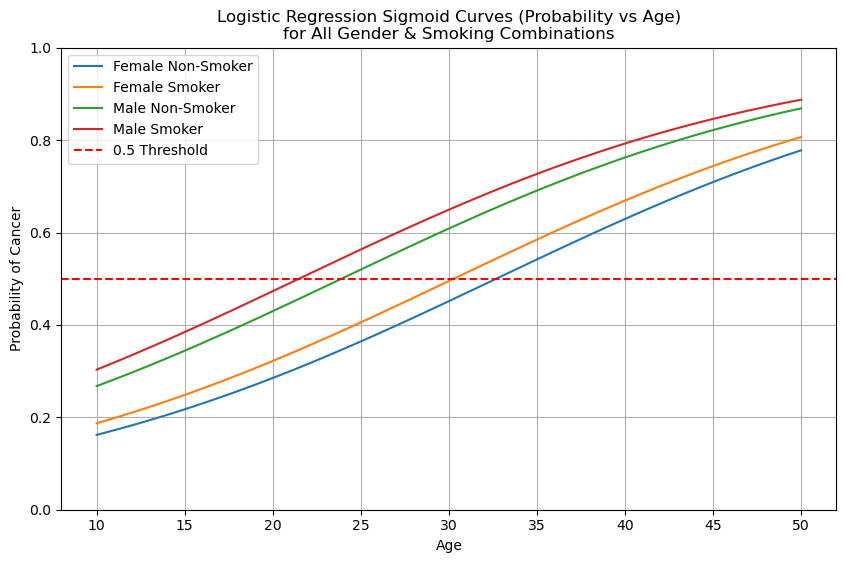

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

data = pd.DataFrame({
    'Age': [18, 45, 43, 23, 33, 22, 25, 12],
    'Gender': ['Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male'],
    'Smoking': ['Smoker', 'Non-Smoker', 'Smoker', 'Smoker', 'Smoker', 'Non-Smoker', 'Smoker', 'Smoker'],
    'Cancer': [0, 0, 1, 0, 1, 1, 1, 0]
})

le_gender = LabelEncoder()
le_smoking = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])
data['Smoking'] = le_smoking.fit_transform(data['Smoking'])

X = data[['Age', 'Gender', 'Smoking']]
y = data['Cancer']

model = LogisticRegression()
model.fit(X, y)

ages = np.linspace(10, 50, 100)

combinations = [
    (0, 0, 'Female Non-Smoker'),
    (0, 1, 'Female Smoker'),
    (1, 0, 'Male Non-Smoker'),
    (1, 1, 'Male Smoker')
]

plt.figure(figsize=(10, 6))

for gender, smoking, label in combinations:
    X_new = pd.DataFrame({
        'Age': ages,
        'Gender': [gender] * len(ages),
        'Smoking': [smoking] * len(ages)
    })
    probs = model.predict_proba(X_new)[:, 1]
    plt.plot(ages, probs, label=label)

plt.title("Logistic Regression Sigmoid Curves (Probability vs Age)\nfor All Gender & Smoking Combinations")
plt.xlabel("Age")
plt.ylabel("Probability of Cancer")
plt.grid(True)
plt.ylim(0, 1)
plt.axhline(0.5, color='red', linestyle='--', label='0.5 Threshold')
plt.legend()
plt.show()


# Logistic Regression with No Preprocessing DUE TO LIMITED DATA

Accuracy: 0.75

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8



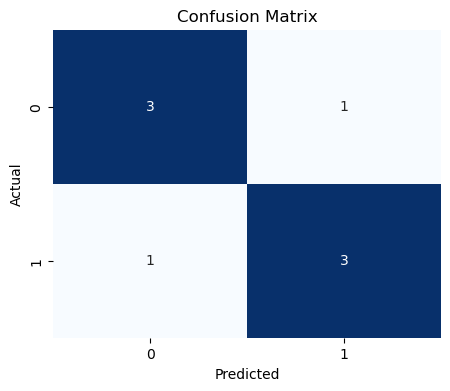

In [4]:
model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)
acc = accuracy_score(y, y_pred)
print("Accuracy:", acc)
print("\nClassification Report:\n")
print(classification_report(y, y_pred))

cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.72

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.69      0.75      0.72        12

    accuracy                           0.72        25
   macro avg       0.72      0.72      0.72        25
weighted avg       0.72      0.72      0.72        25



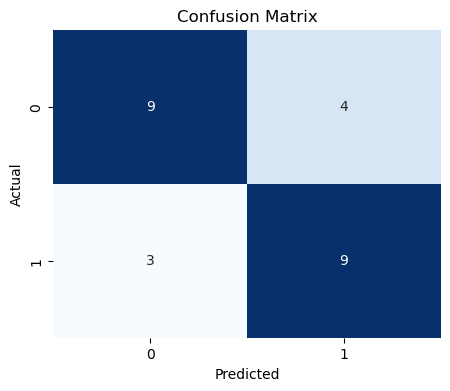

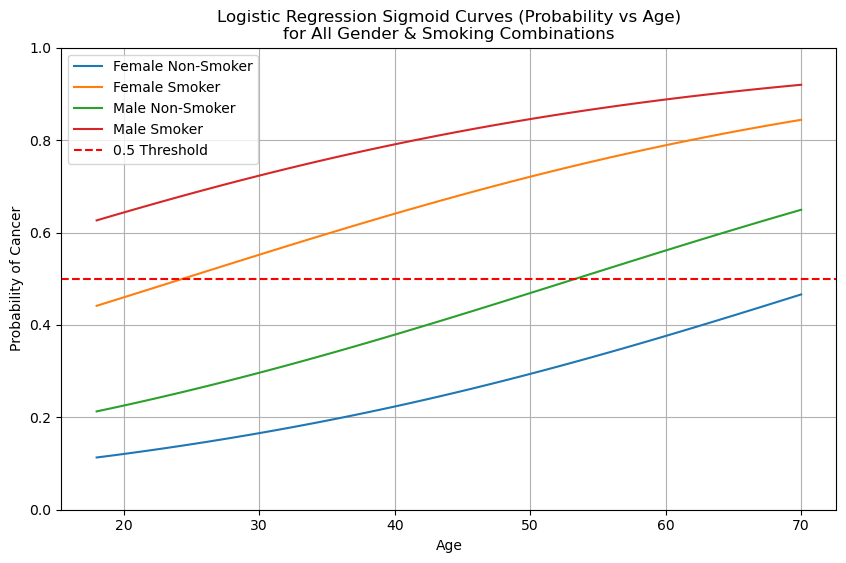

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

np.random.seed(42)

# Generate random dataset
n = 100
ages = np.random.randint(18, 70, n)
genders = np.random.choice(['Male', 'Female'], n)
smoking = np.random.choice(['Smoker', 'Non-Smoker'], n)

# Cancer risk formula for simulation
cancer_probs = 1 / (1 + np.exp(-(-5 + 0.08*ages + 1.5*(genders == 'Male') + 2*(smoking == 'Smoker'))))
cancer = np.random.binomial(1, cancer_probs)

data = pd.DataFrame({
    'Age': ages,
    'Gender': genders,
    'Smoking': smoking,
    'Cancer': cancer
})

le_gender = LabelEncoder()
le_smoking = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])
data['Smoking'] = le_smoking.fit_transform(data['Smoking'])

X = data[['Age', 'Gender', 'Smoking']]
y = data['Cancer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot sigmoid curves for every Gender & Smoking combination
ages_range = np.linspace(18, 70, 100)

combinations = [
    (0, 0, 'Female Non-Smoker'),
    (0, 1, 'Female Smoker'),
    (1, 0, 'Male Non-Smoker'),
    (1, 1, 'Male Smoker')
]

plt.figure(figsize=(10, 6))

for gender, smoke, label in combinations:
    X_new = pd.DataFrame({
        'Age': ages_range,
        'Gender': [gender] * len(ages_range),
        'Smoking': [smoke] * len(ages_range)
    })
    probs = model.predict_proba(X_new)[:, 1]
    plt.plot(ages_range, probs, label=label)

plt.title("Logistic Regression Sigmoid Curves (Probability vs Age)\nfor All Gender & Smoking Combinations")
plt.xlabel("Age")
plt.ylabel("Probability of Cancer")
plt.grid(True)
plt.ylim(0, 1)
plt.axhline(0.5, color='red', linestyle='--', label='0.5 Threshold')
plt.legend()
plt.show()
